# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 


## Get out workdpace ready

In [1]:
# import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Check for GPU availibility
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
## Getting data ready (Converting it into tensors)
labels_csv = pd.read_csv("data/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,0f7db98cbd6f6537c0ac3dfad349b182,scottish_deerhound
freq,1,126


In [4]:
# How many of images are there for each breed
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

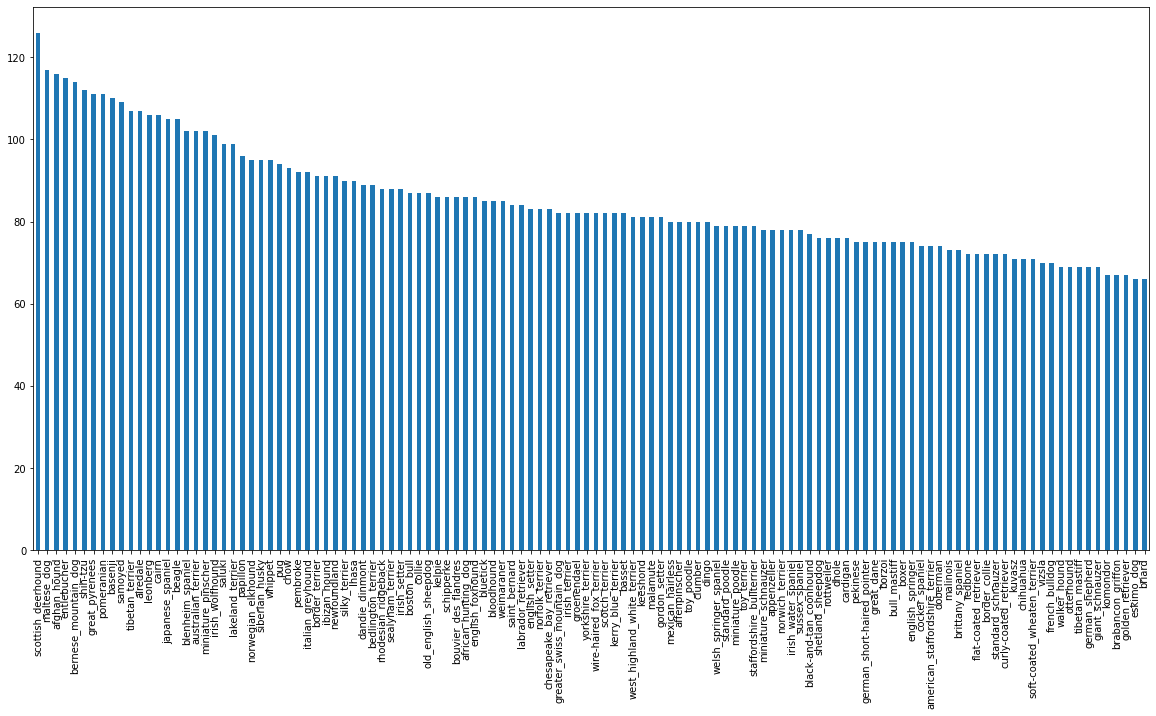

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [6]:
labels_csv["breed"].value_counts().median()

82.0

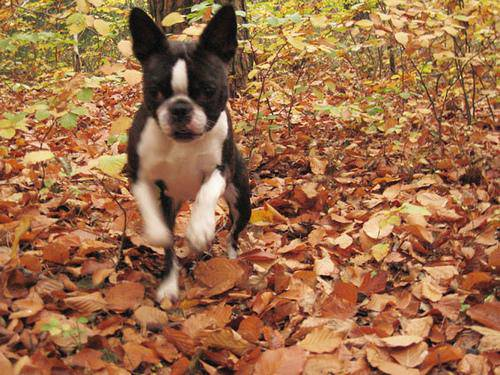

In [7]:
# To view an Image
from IPython.display import Image
Image("data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [8]:
# Getting images and their labels
file_names = ["data/train/"+fname for fname in labels_csv["id"]+".jpg"]

In [9]:
file_names

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'data/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'data/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'data/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'data/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'data/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'data/train/00792e341f3c6eb33663e415d0715370.jpg',
 'data/train/007b5a16db9d9ff9d7ad39982703e429.jpg',
 'data/train/007b8a07882822475a4ce6581e70b1f8.jpg',
 'data/train/007ff9a78eba2aebb558afea3a51c469.jpg',
 'data/train

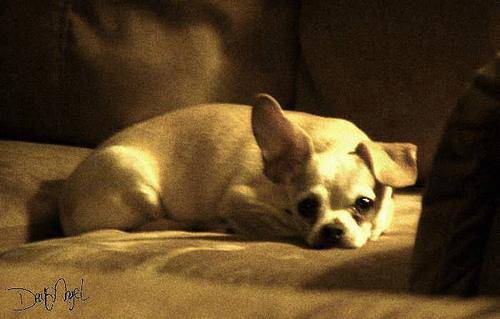

In [10]:
Image(file_names[365])

In [11]:
#To check number of images are equal to the number of labels
import os

print("Yes") if len(os.listdir("data/train/"))==len(file_names) else "No"

Yes


In [12]:
labels = labels_csv["breed"].to_numpy()

In [13]:
len(labels)

10222

In [14]:
unique_breeds =np.unique(labels)

In [15]:
len(unique_breeds)

120

In [16]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
boolean_labels = [label== unique_breeds for label in labels]

In [18]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

In [20]:
# Using pandas for that
dummies = pd.get_dummies(labels_csv["breed"])
dummies

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10219,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Setup X and  variables

X = file_names
y = boolean_labels

In [22]:
NUM_IMAGES=1000

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [24]:
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

## Preprocessing Images (Turning images into tensors)

In [25]:
# Define Image Size
IMG_SIZE=224

def process_image(image_path):
    #Read an image file
    image = tf.io.read_file(image_path)
    
    #Turn the image into numeric tensor with 3 color channels (Red,Blue,Green)
    image = tf.image.decode_jpeg(image,channels=3)
    
    # Convert the color channel values from 0 -255 to 0-1 (Normalization)
    image = tf.image.convert_image_dtype(image,tf.float32)
    
    # Reshape the image to our desired value (224,224)
    image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    
    return image
    

## Turning data into batches

In [26]:
def get_image_label(image_path,label):
    image = process_image(image_path)
    return image,label
    

In [27]:
BATCH_SIZE=32

# Create a function to convert data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    if test_data:
        print("Creating batches for test data")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print("Creating batches for validation data")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch                                                      
    else:
        print("Creating batches for training data")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        # Shuffling pathnames and labels before mapping
        data= data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch                                        

In [28]:
# Creating training and validation data batches
train_data = create_data_batches(X_train,y_train)
valid_data = create_data_batches(X_val,y_val,valid_data=True)

Creating batches for training data
Creating batches for validation data


In [29]:
train_data.element_spec,valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [30]:
def show_25_images(images,labels):
    #Setup the figure
    plt.figure(figsize=(10,10))
    #Loop through 25 to display 25 images
    for i in range(25):
        #create subplots 5 rows , 5 columns
        ax = plt.subplot(5,5,i+1)
        #Display an image
        plt.imshow(images[i])
        #Add the label as titles
        plt.title(unique_breeds[labels[i].argmax()])
        #Tunr the grid lines off
        plt.axis("off")

In [31]:
train_images,train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

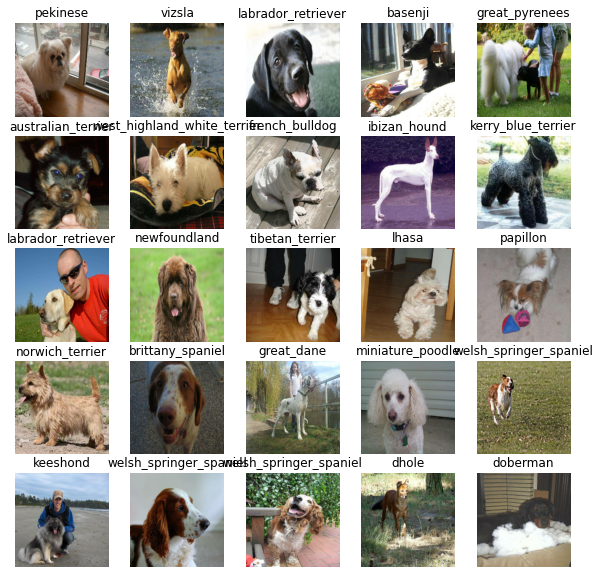

In [32]:
# visualizing data
show_25_images(train_images,train_labels)

## Building a model

In [33]:
#Setup input and output shape for model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] # batch, height, width, color channel

OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from tesnorflow hub

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [34]:
# Creatng a funtion wich builds Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("Building model with :"+ model_url)
    
    #Setup the model url
    model = tf.keras.Sequential([hub.KerasLayer(model_url),tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])
    
    #Compile the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
    
    #Build the model
    model.build(INPUT_SHAPE)
    
    return model

In [35]:
model = create_model()
model.summary()

Building model with :https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [36]:
# Creating call backs
# Load tensorboard extension
%load_ext tensorboard

In [37]:
import datetime

# Create a function to call tensorboard callback
def create_tensorboard_callback():
    logdir = os.path.join("logs/",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [38]:
# Early stopping call back
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## Training a model

Our First model is going to train on 1000 images only to check if it is working properly

In [39]:
NUM_EPOCHS = 100

In [40]:
# Create a function which trains the model
def train_model():
    #Create a model
    model = create_model()
    
    #Create new tensorboard session
    tensorboard = create_tensorboard_callback() 
    
    # Fit the model in the data
    model.fit(x=train_data,epochs=NUM_EPOCHS, validation_data=valid_data,validation_freq=1,callbacks=[tensorboard,early_stopping])
    return model

In [41]:
model = train_model()

Building model with :https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 78s 2s/step - loss: 5.1556 - accuracy: 0.0447 - val_loss: 3.5288 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 27s 1s/step - loss: 2.0061 - accuracy: 0.5940 - val_loss: 2.2093 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 27s 1s/step - loss: 0.6109 - accuracy: 0.9210 - val_loss: 1.7322 - val_accuracy: 0.5450
Epoch 4/100
25/25 [==============================] - 27s 1s/step - loss: 0.2896 - accuracy: 0.9908 - val_loss: 1.5522 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 27s 1s/step - loss: 0.1492 - accuracy: 0.9998 - val_loss: 1.4683 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 27s 1s/step - loss: 0.0987 - accuracy: 1.0000 - val_loss: 1.4156 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================] - 27s 1s/s

In [42]:
# Checking the log files
%tensorboard --logdir logs

## Making and Evaluating Prediction using a trained model 

In [45]:
prediction = model.predict(valid_data,verbose=1)
prediction

7/7 [==============================] - 4s 704ms/step


array([[2.57407688e-03, 5.07994264e-05, 1.01291249e-03, ...,
        1.17065763e-04, 9.39066013e-06, 1.29868754e-03],
       [3.82243795e-03, 2.76752049e-04, 4.37207706e-03, ...,
        1.16857269e-03, 4.15155012e-03, 1.19163276e-04],
       [2.50312041e-06, 2.31131073e-03, 1.46632474e-05, ...,
        1.30578846e-04, 1.34180891e-05, 3.53365205e-04],
       ...,
       [3.58091779e-06, 1.61121789e-04, 2.64443894e-04, ...,
        1.02599806e-04, 2.81016764e-05, 5.46508760e-04],
       [3.69536597e-03, 4.25866310e-05, 1.08157583e-04, ...,
        1.72935557e-04, 8.73998433e-05, 1.08069899e-02],
       [1.81768424e-04, 3.35723817e-05, 2.69317738e-04, ...,
        8.59204773e-03, 7.41263386e-04, 1.54908441e-04]], dtype=float32)

In [47]:
prediction.shape

(200, 120)

In [76]:
# First prediction
index = 65
print(f"Max value :{np.max(prediction[index])}")
print(f"Sum :{np.sum(prediction[index])}")
print(f"Max index :{np.argmax(prediction[index])}")
print(f"Predicted label :{unique_breeds[np.argmax(prediction[index])]}")

Max value :0.18365223705768585
Sum :0.9999999403953552
Max index :17
Predicted label :border_terrier


In [77]:
# Turn the prediction probabilty to thier respective labels
def get_pred_label(prediction_prob):
    return unique_breeds[np.argmax(prediction_prob)]

In [81]:
pred_label = get_pred_label(prediction[81])
pred_label

'brittany_spaniel'

In [82]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [104]:
# Create a function to unbatch a dataset

def unbatchify(batched_data):
    images =[]
    labels =[]

    for image,label in batched_data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images,labels

In [105]:
val_images,val_labels = unbatchify(valid_data)

In [93]:
get_pred_label(val_labels[0])

'cairn'

In [110]:
# Create a funtion to visualize the data
def plot_pred(prediction_prob,labels,images,n=1):
    pred_prob , true_label,image = prediction_prob[n],labels[n],images[n]
    
    # get the pred label
    pred_label = get_pred_label(pred_prob)
    
    #Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the color of title
    if pred_label==true_label:
        color="green"
    else:
        color="red"
    
    #Change plot title to be predicted, probabilty of prediction and truth label
    plt.title("{}{:2.0f}%{}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)
    
    

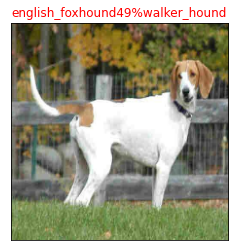

In [113]:
plot_pred(prediction,val_labels,val_images,32)

In [130]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    pred_label = get_pred_label(pred_prob)

    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,color="grey")
    
    plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation="vertical")

    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

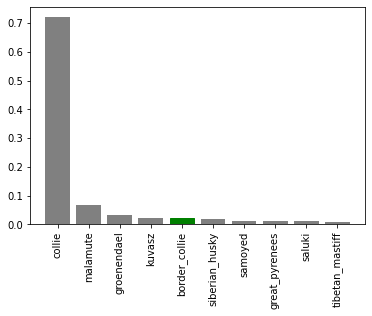

In [131]:
plot_pred_conf(prediction_probabilities=prediction,labels=val_labels,n=9)

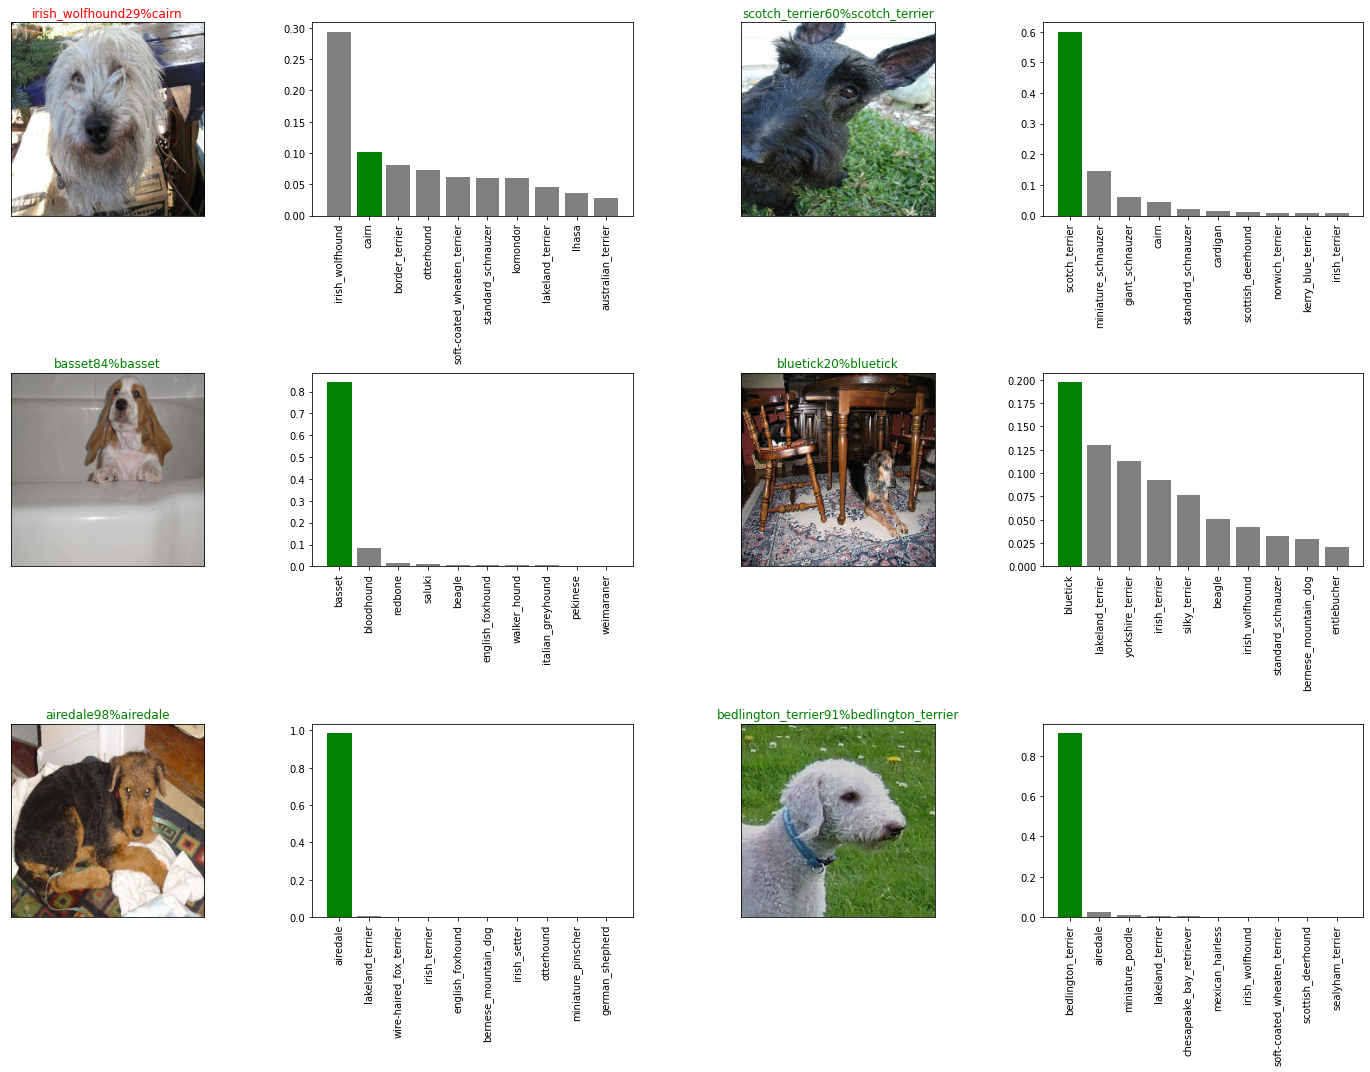

In [132]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_prob=prediction,labels=val_labels,images=val_images,n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=prediction,labels=val_labels,n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Save and reload model

In [155]:
# Create a function to save a model
def save_model(model,suffix=None):
    #Create a model directory pathname with current time
    modeldir = os.path.join("models/",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir+"-"+suffix+".h5"
    print(f"Saving model to :{model_path}....")
    model.save(model_path)
    return model_path

In [134]:
# Create a function to load a trained model
def load_model(model_path):
    print(f"Loading saved model from :{model_path}....")
    model = tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [156]:
save_model(model,suffix="1000-images-mobilenetv2-Adam")

Saving model to :models/20210509-172151-1000-images-mobilenetv2-Adam.h5....


'models/20210509-172151-1000-images-mobilenetv2-Adam.h5'

In [159]:
loaded_1000_image_model = load_model("models/20210509-172151-1000-images-mobilenetv2-Adam.h5")

Loading saved model from :models/20210509-172151-1000-images-mobilenetv2-Adam.h5....


In [161]:
# evaluating pre saved model
model.evaluate(valid_data)

7/7 [==============================] - 5s 613ms/step - loss: 1.3321 - accuracy: 0.6400


[1.3321254253387451, 0.6399999856948853]

In [162]:
# evaluating loaded model
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 6s 622ms/step - loss: 1.3321 - accuracy: 0.6400


[1.3321254253387451, 0.6399999856948853]

## Training the model on full data set

In [163]:
# Create a data batch with full data set
full_data = create_data_batches(X,y)

Creating batches for training data


In [164]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [165]:
#Create a model for full data
full_model = create_model()

Building model with :https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [166]:
# Create a fullmodel call back
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [167]:
# Fit the full data into model
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 421s 1s/step - loss: 2.3916 - accuracy: 0.4768
Epoch 2/100
320/320 [==============================] - 270s 844ms/step - loss: 0.3898 - accuracy: 0.8931
Epoch 3/100
320/320 [==============================] - 271s 846ms/step - loss: 0.2154 - accuracy: 0.9434
Epoch 4/100
320/320 [==============================] - 270s 844ms/step - loss: 0.1446 - accuracy: 0.9683
Epoch 5/100
320/320 [==============================] - 271s 848ms/step - loss: 0.0976 - accuracy: 0.9795
Epoch 6/100
320/320 [==============================] - 272s 850ms/step - loss: 0.0722 - accuracy: 0.9891
Epoch 7/100
320/320 [==============================] - 272s 850ms/step - loss: 0.0564 - accuracy: 0.9923
Epoch 8/100
320/320 [==============================] - 271s 847ms/step - loss: 0.0416 - accuracy: 0.9962
Epoch 9/100
320/320 [==============================] - 272s 849ms/step - loss: 0.0345 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 27

In [168]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

Saving model to :models/20210509-205041-full-image-set-mobilenetv2-Adam.h5....


'models/20210509-205041-full-image-set-mobilenetv2-Adam.h5'

In [169]:
loaded_full_model = load_model("models/20210509-205041-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from :models/20210509-205041-full-image-set-mobilenetv2-Adam.h5....


## Making Prediction on Test Dataset

In [172]:
# Load Test image file names
test_ids = os.listdir("data/test/")
len(test_ids)

10357

In [176]:
test_images = ["data/test/"+fname for fname in test_ids]

In [177]:
test_images[:2]

['data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'data/test/00102ee9d8eb90812350685311fe5890.jpg']

In [178]:
test_data=create_data_batches(test_images,test_data=True)

Creating batches for test data


In [179]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [223]:
test_preds=loaded_full_model.predict(test_data,verbose=1)
test_preds

324/324 [==============================] - 272s 842ms/step


array([[2.5443020e-12, 6.6585734e-13, 1.2938589e-15, ..., 2.6144458e-14,
        3.0124656e-10, 2.0787111e-12],
       [1.4759171e-06, 1.7372768e-06, 2.7332758e-08, ..., 1.6977746e-11,
        2.8595357e-08, 6.7836903e-10],
       [7.9260201e-12, 1.5170309e-07, 6.0883880e-09, ..., 1.3900502e-06,
        8.5304411e-12, 1.0612081e-10],
       ...,
       [1.5377493e-09, 1.2505558e-09, 1.5074905e-07, ..., 3.3967586e-12,
        1.7514802e-07, 4.4356496e-10],
       [1.5838140e-04, 3.3956408e-07, 2.4573065e-08, ..., 3.5639400e-09,
        3.6627331e-05, 4.5340435e-05],
       [3.2895116e-08, 2.1325970e-07, 2.6472449e-07, ..., 2.7233213e-03,
        3.9972505e-09, 2.2795060e-10]], dtype=float32)

In [183]:
test_preds.shape

(10357, 120)

In [188]:
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))

In [189]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [197]:
preds_df_rows=[]
for item in test_ids:
    preds_df_rows.append(item[:-4])

In [201]:
preds_df["id"] = preds_df_rows

In [205]:
preds_df.shape

(10357, 121)

In [204]:
preds_df[list(unique_breeds)]=test_preds

In [207]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00102ee9d8eb90812350685311fe5890,0.000001,0.000002,0.0,0.0,0.000001,0.0,0.000001,0.000001,0.0,...,0.0,0.0,0.0,0.000002,0.0,0.0,0.000323,0.0,0.0,0.0
2,0012a730dfa437f5f3613fb75efcd4ce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.0
3,001510bc8570bbeee98c8d80c8a95ec1,0.000004,0.000001,0.0,0.000002,0.000051,0.0,0.0,0.0,0.0,...,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.001861,0.0,0.0
4,001a5f3114548acdefa3d4da05474c2e,0.000115,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
preds_df.to_csv("data/Final Submission.csv",index=False)

In [209]:
preds_df.shape

(10357, 121)

## Making Prediction on custom images


In [258]:
custom_ids = os.listdir("data/custom dog images/")
len(custom_ids)

2

In [259]:
custom_ids

['dog_1.jpg', 'dog_2.jpg']

In [260]:
custom_images = ["data/custom dog images/"+fname for fname in custom_ids]
custom_images

['data/custom dog images/dog_1.jpg', 'data/custom dog images/dog_2.jpg']

In [261]:
custom_data=create_data_batches(custom_images,test_data=True)

Creating batches for test data


In [262]:
custom_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [263]:
custom_preds=loaded_full_model.predict(custom_data)

In [264]:
custom_preds[0]

array([8.82949061e-11, 1.27581608e-11, 2.92551356e-14, 3.03295520e-15,
       3.25276334e-11, 2.10115042e-12, 2.72482097e-13, 1.97094381e-12,
       9.03513850e-14, 8.89865845e-14, 3.89976246e-13, 1.59058350e-10,
       1.63284372e-10, 1.88037740e-14, 2.05844348e-13, 1.37327484e-11,
       1.01810593e-09, 2.42044535e-15, 8.80788845e-12, 1.45366195e-13,
       6.88949548e-13, 6.13667667e-12, 2.30107816e-12, 1.07450214e-12,
       3.13135000e-12, 3.36385135e-13, 2.77408999e-12, 5.02400151e-13,
       1.94157190e-12, 3.40096603e-13, 1.79701240e-10, 3.20277346e-11,
       4.90001919e-12, 3.10981102e-11, 4.80617438e-14, 4.56175218e-14,
       2.78741873e-12, 1.07221069e-13, 1.48859883e-11, 6.31243267e-13,
       4.28813755e-12, 1.04962393e-11, 7.11901892e-13, 7.09452905e-08,
       9.41695506e-12, 3.49323191e-13, 2.26459667e-11, 4.30738474e-12,
       7.08132249e-15, 2.65838657e-10, 2.78677437e-09, 2.67072063e-14,
       5.58008537e-08, 3.96528366e-11, 5.82120151e-07, 1.42651993e-12,
      

In [265]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['samoyed', 'cardigan']

In [266]:
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

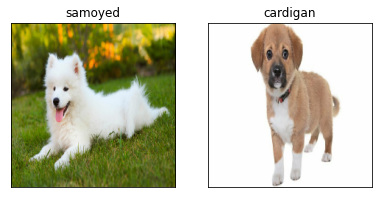

In [267]:
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)